# Scenario 1: Collecting data by BioCatHub and visualisation
Dataset provided by Jan-Dirk Spöring (Institute of Bio- and Geosciences 1, Forschungszentrum Jülich, 52428 Jülich, Germany)  
  
This is a concise scenario to showcase one of our collaborators, [BioCatHub](https://biocathub.net) {cite}`biocathub_2020`.  
For this, with the help of Stephan Malzacher, I created the dataset on the BioCatHub website from the data provided by Jan-Dirk Spöring and downloaded it in the EnzymeML data format. The following Jupyter Notebook will read the EnzymeML document and visualise the time-course data.  
For this short scenario, no modelling is done.

## Imports
First, all necessary Python packages must be installed and imported.  
If you run this notebook with Binder, you don't have to install anything. Binder takes care of this.   
If you run this notebook locally, make sure you have all Packages installed. All needed packages with the used version can be found in the `requirements.txt` in the root GitHub directory (not in `\book`).

In [1]:
import os
import matplotlib.pyplot as plt
from pyenzyme.enzymeml.core import EnzymeMLDocument

## Reading EnzymeML with PyEnzyme software
In order to read the EnzymeML document and access its content with the PyEnzyme software, the file path is defined.  
If you want to run this Jupyter Notebook locally, make sure you have the same folder structure or change the path accordingly.  
When running the following code cell, the EnzymeML document is saved in the `enzmlDoc` variable, and an overview is printed below.

In [2]:
path = '../../data/Spoering_Measurements_orig.omex'

# check for correct file path and file extension:
if os.path.isfile(path) and os.path.basename(path).lower().endswith('.omex'):
    enzmlDoc = EnzymeMLDocument.fromFile(path)
    enzmlDoc.printDocument()
else:
    raise FileNotFoundError(
        f'Couldnt find file at {path}.'
    )

Sporing_Measurements
>>> Reactants
	ID: s0 	 Name: Propanal
	ID: s1 	 Name: Propioin
>>> Proteins
	ID: p0 	 Name: Benzoin Aldolase
>>> Complexes
>>> Reactions
	ID: r0 	 Name: Propioin synthesis


The overview shows which reactant corresponds to which internal ID. These IDs can be used to access the species.  
The conducted experiments are saved as measurements. These measurements contain information about the experiment conditions such as temperature and pH, initial concentration for all involved species and the measured time-course data. Here each measurement consists of 2 reactants and one protein (p0).
Only one measurement was conducted and is examined in the following output.

In [3]:
# fetch the measurement and inspect the scheme
measurement = enzmlDoc.getMeasurement('m0')
measurement.printMeasurementScheme()

>>> Measurement m0: Propioin synthesis 1
    s0 | initial conc: 200.0 mmole / l 	| #replicates: 3
    s1 | initial conc: 0.0 mmole / l 	| #replicates: 0
    p0 | initial conc: 30.0 mg / ml 	| #replicates: 0


The overview of the measurement shows that the product propioin (s1) has three replicates, which contain the measured time-course data.

## Data preparation
In this scenario, the recorded time-course data should be visualised. The inbuilt function `exportData` for the measurement is used to extract the relevant data. It returns a dictionary with initial concentrations and the time-course data stored in a pandas DataFrame, which can be used for simple visualisation.

In [4]:
# get reaction name for the title of the visualisation
reaction_name = enzmlDoc.getReaction('r0').name

# get time-course data and prepare it for visualisation
measurementDict = measurement.exportData()
time_course_data = measurementDict['reactants']['data']
time_course_data = time_course_data.set_index(time_course_data.columns[0])
time_course_data

,prod1_repl1/s0/mmole / l,prod1_repl2/s0/mmole / l,prod1_repl3/s0/mmole / l
time/min,,,
0.0,0.000000,0.000000,0.000000
15.0,63.784611,66.106679,67.447746
30.0,77.957073,80.538850,81.174757
60.0,80.241658,85.079882,88.266513
120.0,81.314628,90.150488,85.021530


## Visualisation of time-course data
All time-course data is visualised with the Python library Matplotlib.  
To save the figure as SVG uncomment the `plt.savefig(...)` code line.

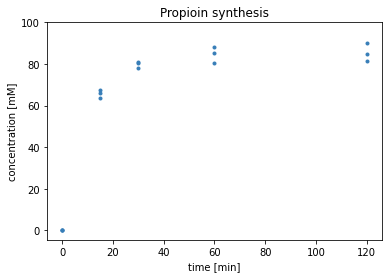

In [5]:
plt.figure()
ax = plt.subplot()
ax.plot(time_course_data, 'o', ms=3, color='#377eb8')
plt.title(reaction_name)
ax.set_xlabel(f"time [{enzmlDoc.getMeasurement('m0').global_time_unit}]")
ax.set_ylabel('concentration [mM]')
ax.set_ylim(ymax = 100)
# save as svg
# plt.savefig('time-course.svg', bbox_inches='tight')
plt.show()

The plot shows the synthesis of propioin from propanal. The initial concentration of propanal was 200 mM, and two propanal form one propioin. Since the curves don't reach 100 mM, not all propanal was converted.  

## Upload to DaRUS 
Since this scenario is part of a momentarily written paper, it will be uploaded to a DataVerse on DaRUS, the data repository of the University of Stuttgart, and get a DOI. 

## Final remarks
This is the first and shortest of the scenarios in my report. Therefore it is a good starting point for them.